<a href="https://colab.research.google.com/github/iampramodyadav/FEA/blob/main/FEA_1D_Element.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# Natural Coordinate: Shape Funtion and its derivative

Pramod Kumar Yadav (@iampramodyadav)




---



- This programme calculates the values of shape functions and their derivatives.
- plot the shape funtions




## Function for shape function
- [nptel reference](https://nptel.ac.in/content/storage2/courses/112104116/lecture-11/11_10.htm)
- [SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)

In [128]:
from sympy import *

In [129]:
z=Symbol('z')

In [130]:
def SHAPE(p,z):
  '''
  SHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return shape funtions values at given x
  '''
  z=Symbol('z')
  n=[]

  for i in range(0, p+1):
    point=-1
    point=point+2*i/p
    n.append(point)

  shape=[1]*(p+1)
  for i in range(0,p+1):
    for j in range(0,p+1):
      if i!=j:
        shape[i]=shape[i]*((z-n[j])/(n[i]-n[j]))
  return shape

In [131]:
print(SHAPE.__doc__)


  SHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return shape funtions values at given x
  


## Function for derivative of shape function
- [SymPy Documentation](https://docs.sympy.org/latest/tutorial/calculus.html)
- [Reference](https://stackoverflow.com/questions/47998930/differentiation-of-a-list-of-functions-with-respect-to-a-list-of-variables)



In [132]:
def dSHAPE(p,z):
  '''
  dSHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return derivative of shape funtions values at given x
  '''  
  z=Symbol('z')
  f=SHAPE(p,z)
  z=symbols('z')
  return [simplify(diff(f1, z)) for f1 in f]

In [133]:
print(dSHAPE.__doc__)


  dSHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return derivative of shape funtions values at given x
  




---



In [134]:
df=dSHAPE(3,z)
print('Derivative of shape function:\n',df)

Derivative of shape function:
 [-1.6875*z**2 + 1.125*z + 0.0625000000000001, 5.0625*z**2 - 1.125*z - 1.6875, -5.0625*z**2 - 1.125*z + 1.6875, 1.6875*z**2 + 1.125*z - 0.0624999999999999]


In [135]:
f=SHAPE(3,z)
print('Shape funtion:\n',f ,'\n')

print('Simplified shape funtion:\n',[simplify(f1) for f1 in f])

Shape funtion:
 [(0.25 - 0.75*z)*(0.5 - 0.5*z)*(-1.5*z - 0.5), (0.5 - 1.5*z)*(0.75 - 0.75*z)*(1.5*z + 1.5), (1.5 - 1.5*z)*(0.75*z + 0.75)*(1.5*z + 0.5), (0.5*z + 0.5)*(0.75*z + 0.25)*(1.5*z - 0.5)] 

Simplified shape funtion:
 [-0.5625*z**3 + 0.5625*z**2 + 0.0625*z - 0.0625, 1.125*(z - 1)*(z + 1)*(1.5*z - 0.5), -1.125*(z - 1)*(z + 1)*(1.5*z + 0.5), 0.5*(0.75*z + 0.25)*(z + 1)*(1.5*z - 0.5)]


In [136]:
simplify(f[0]) #first term

-0.5625*z**3 + 0.5625*z**2 + 0.0625*z - 0.0625

In [137]:
df[0] #deruvative of first term

-1.6875*z**2 + 1.125*z + 0.0625000000000001



---



## Visualization: Plotting shape functions

In [138]:
import seaborn as sns

In [139]:
def plotSHAPE(p,z):
  '''
  plotSHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return plot of shape funtions
  '''
  sns.set()
  sns.set_style("whitegrid", {'grid.linestyle': '--'})

  z=Symbol('z')
  f=SHAPE(p,z)
  p1=plot(0,(z,-1,1),show=False)
  for i in f:
    p2=plot(i,(z,-1,1),show=False)
    p1.append(p2[0])

  return p1.show()

In [140]:
print(plotSHAPE.__doc__)


  plotSHAPE(p,z)
  p: order (p) of approximation
  z:value of natural coordinate
  This function return plot of shape funtions
  


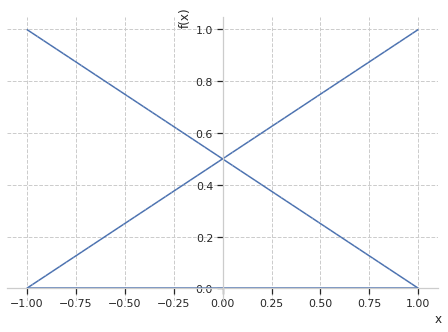

In [141]:
plotSHAPE(1,z)

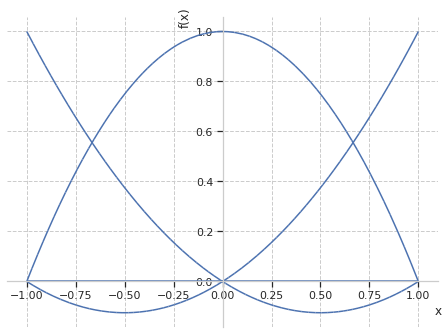

In [142]:
plotSHAPE(2,z)

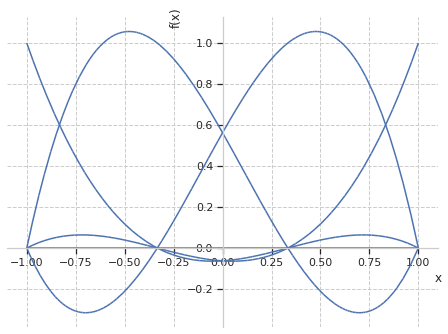

In [143]:
plotSHAPE(3,z)

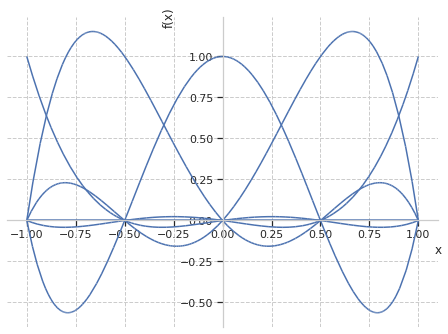

In [144]:
plotSHAPE(4,z)

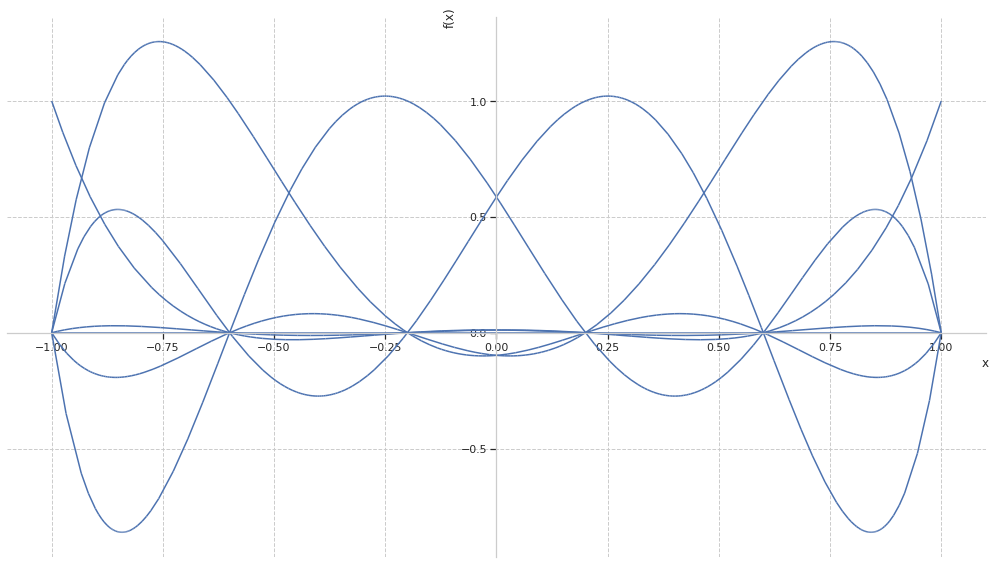

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8

plotSHAPE(5,z)



---



# Gauss-Legendre Quadrature implementation in Python
Pramod Kumar Yadav (@iampramodyadav)



---



## Legendre Polynomial (symbolic)

[SymPy Documentation](https://docs.sympy.org/latest/tutorial/basic_operations.html)

[Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)

In [146]:
from sympy import *
import numpy as np

In [147]:
x=symbols('x')

In [148]:
def Legendre(n,x):
  """
  n: Order of polynomial
  x: Variable
  This function print Legendre polynomial of order n
  """

  x=symbols('x')
  if (n==0):
    return x*0+1.0
  elif (n==1):
    return x
  else:
    return ((2.0*n-1.0)*x*Legendre(n-1,x)-(n-1)*Legendre(n-2,x))/n

In [149]:
print(Legendre.__doc__)


  n: Order of polynomial
  x: Variable
  This function print Legendre polynomial of order n
  


In [150]:
Legendre(2,x)

1.5*x**2 - 0.5

## Derivative of the Legendre polynomials

In [151]:
def DLegendre(n,x):
  """
  n: Order of polynomial
  x: Variable
  This function print Derivative of Legendre polynomial of order n
  """
  x=symbols('x')
  if (n==0):
    return x*0
  elif (n==1):
    return x*0+1.0
  else:
    return (n/(x**2-1.0))*(x*Legendre(n,x)-Legendre(n-1,x))

In [152]:
print(DLegendre.__doc__)


  n: Order of polynomial
  x: Variable
  This function print Derivative of Legendre polynomial of order n
  


In [153]:
simplify(DLegendre(2,x))

3.0*x

## Plot Legendre Polynomial

In [154]:
f=Legendre(3,x)

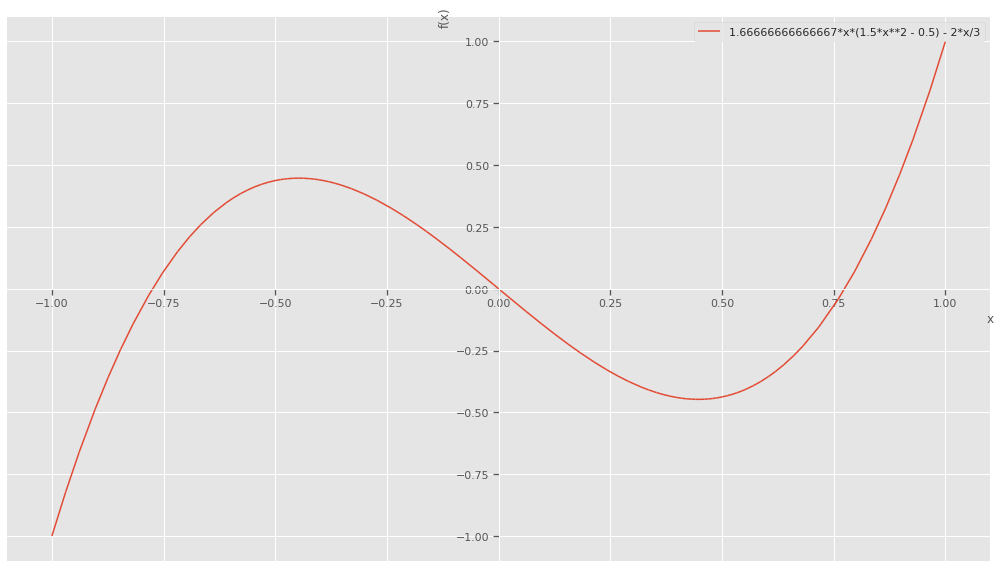

In [155]:
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8
style.use('ggplot')
plot(f,(x,-1,1),legend=True)

In [156]:
f1=Legendre(1,x)
f2=simplify(Legendre(3,x))

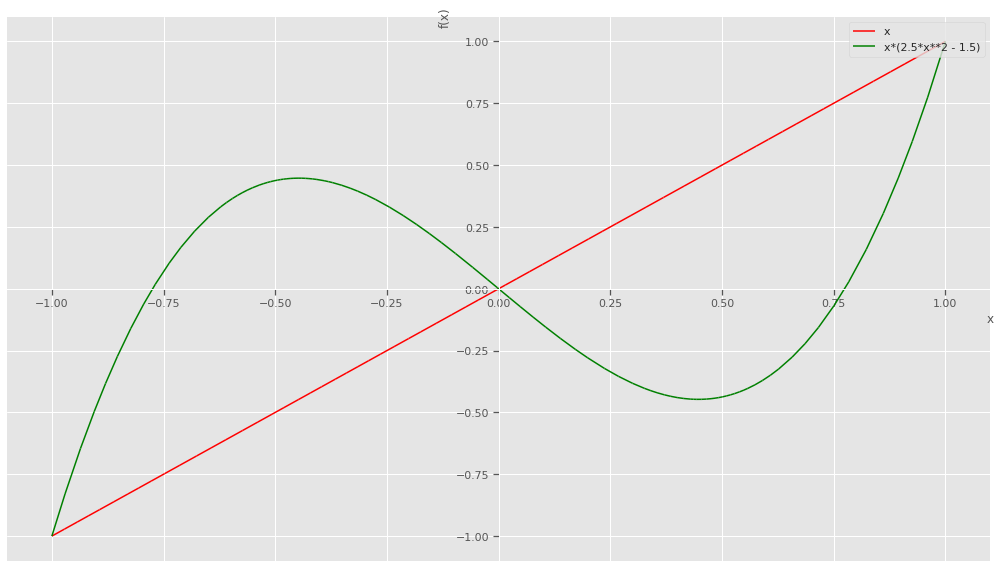

In [157]:
pl=plot(f1,f2,(x,-1,1),legend=True,show=False)
pl[0].line_color = 'red'
pl[1].line_color = 'green'
pl.show()

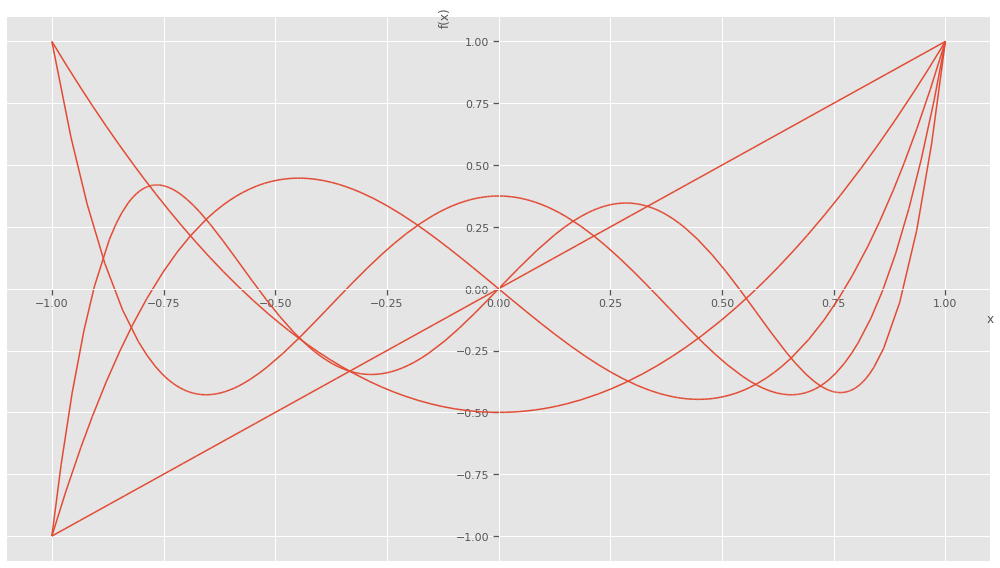

In [158]:
plot(Legendre(1,x),Legendre(2,x),Legendre(3,x),Legendre(4,x),Legendre(5,x),(x,-1,1))

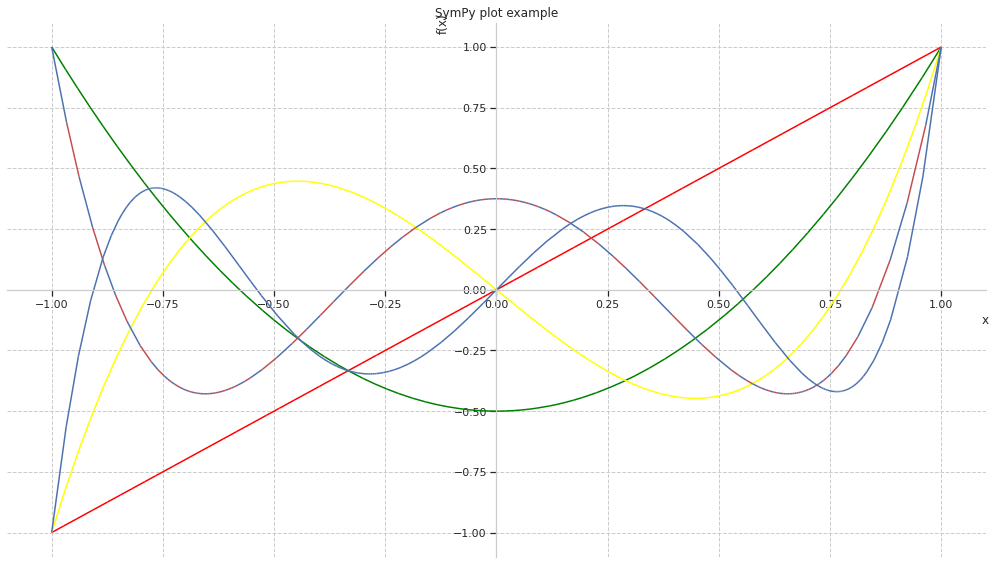

In [159]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
p=plot(Legendre(1,x),Legendre(2,x),Legendre(3,x),Legendre(4,x),Legendre(5,x),(x,-1,1),title='SymPy plot example',show=False);
p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'yellow'
p[3].line_color = ['b','r']
p.figsize=(14, 8)
p.show()

## Legedre Roots

In [160]:
def LegendreRoots(polyorder,tolerance=1e-20):
  """
  polyorder: Order of polynomial(>2)
  tolerance: tolerance of error (default: 1e-20)
  This function return Roots of Legendre polynomial
  """
  if polyorder<2:
    err=1 # bad polyorder no roots can be found
  else:
    roots=[]
		# The polynomials are alternately even and odd functions. So we evaluate only half the number of roots. 
    for i in range(1,int((polyorder)/2) +1): 
      x1=cos(pi*(i-0.25)/(polyorder+0.5))
      error=10*tolerance
      iters=0
      while (error>tolerance) and (iters<1000):
        dx=-Legendre(polyorder,x)/DLegendre(polyorder,x)
        dx=N(dx.subs(x,x1))
        x1=N(x1+dx)
        iters=iters+1
        error=abs(dx)
      #print(roots)
      roots.append(x1)
      #print(roots)
		# Use symmetry to get the other roots
    roots=np.array(roots)
    if polyorder%2==0:
      roots=np.concatenate( (-1.0*roots, roots[::-1]) )
    else:
      roots=np.concatenate( (-1.0*roots, [0.0], roots[::-1]) )
    err=0 # successfully determined roots
  return [roots, err]

In [161]:
print(LegendreRoots.__doc__)


  polyorder: Order of polynomial(>2)
  tolerance: tolerance of error (default: 1e-20)
  This function return Roots of Legendre polynomial
  


In [162]:
LegendreRoots(5)

[array([-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683,
        0.906179845938664], dtype=object), 0]

## Weight Coefficient

In [163]:
def GaussLegendreWeights(polyorder):
  """
  polyorder: Order of polynomial
  This function return Weights of Legendre polynomial
  """
  W=[]
  [xis,err]=LegendreRoots(polyorder)
  xis=list(xis)
  if err==0:
    for x1 in xis:
      w=2.0/( (1.0-x**2)*(DLegendre(polyorder,x)**2) )
      w=w.subs(x,x1)
      W.append(w)
      err=0
  else:
    err=1 # could not determine roots - so no weights
  return [W, xis, err]

In [164]:
print(GaussLegendreWeights.__doc__)


  polyorder: Order of polynomial
  This function return Weights of Legendre polynomial
  


## Final Result

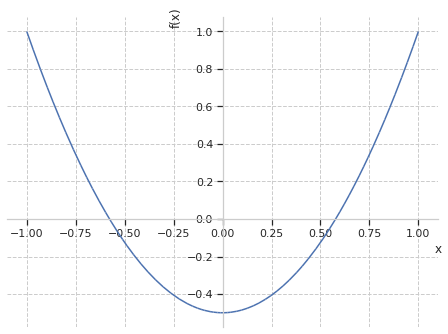

order: 2
Weights: [1.00000000000000, 1.00000000000000]
Roots    :  [-0.577350269189626, 0.577350269189626]





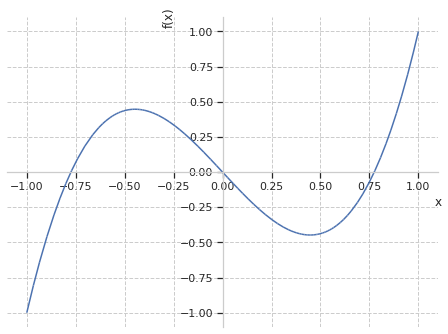

order: 3
Weights: [0.555555555555556, 0.888888888888889, 0.555555555555556]
Roots    :  [-0.774596669241483, 0.0, 0.774596669241483]





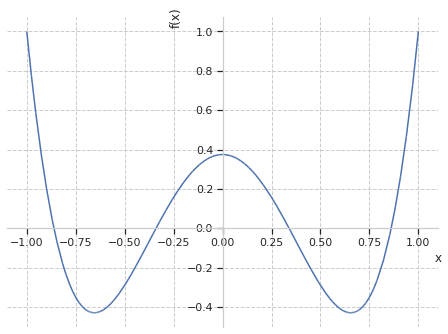

order: 4
Weights: [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]
Roots    :  [-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053]





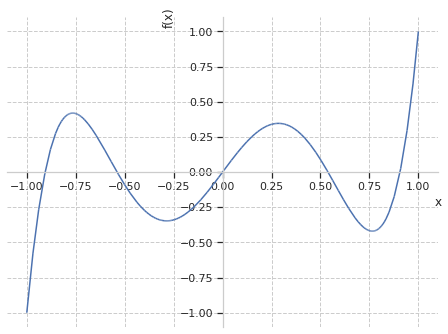

order: 5
Weights: [0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189]
Roots    :  [-0.906179845938664, -0.538469310105683, 0.0, 0.538469310105683, 0.906179845938664]





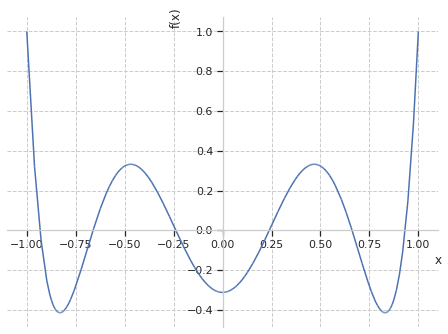

order: 6
Weights: [0.171324492379171, 0.360761573048138, 0.467913934572691, 0.467913934572691, 0.360761573048138, 0.171324492379171]
Roots    :  [-0.932469514203152, -0.661209386466265, -0.238619186083197, 0.238619186083197, 0.661209386466265, 0.932469514203152]





In [165]:
for Polyorder in range(2,7):
  plt.rcParams['figure.figsize'] = 6.4, 4.8
  plot(Legendre(Polyorder,x),(x,-1,1))

  [W, xis, err]=GaussLegendreWeights(Polyorder)
  print("order:", Polyorder)
  print("Weights:", W)
  print ("Roots    : ",xis)

  print('='*110)
  print('\n\n')
  print('='*110)



---




---



# SHAPALL



```
Subroutine SHAPALL (p, n, psi, w, ndofel, shaptot, dshaptot)

pbar = max (2p-1, p+2)

if pbar is odd
     n = (pbar+1)/2
     else
     n = (pbar+2)/2
end if

call INTG-PNTS (n, psi, w)

do i = 1, n
      psi = psi (i)
      call SHAPE ( p, psi, ndofel, shap, dshap)
      do j = 1, ndofel
      shaptot ( i, j ) = shap (ndofel)
      dshaptot ( i, j) = dshap (ndofel)
   end do
end do
```


In [264]:
def SHAPALL(p):
  p=int(p)

  pbar=max(2*p, p+2) 
  if pbar%2!=0:                                   #if odd
    n=(pbar+1)/2
  else:
    n=(pbar+2)/2

  n=int(n)

  #print("Order of gauss legendre polynomial:",n)

  [W, xis, err]=GaussLegendreWeights(n)           #order: Polyorder(n), Weights:  W, Roots: xis

  ShapeValueXi=np.zeros((n, p+1))
  dShapeValueXi=np.zeros((n, p+1))

  #print('ndofel(p+1):',p+1)
  #print('Shape of shape value matrix:',ShapeValueXi.shape)

  s=SHAPE(p,z)
  ds=dSHAPE(p,z)

  for i in range(0,n):
    for j in range(0,p+1):

      ShapeValueXi[i][j]=s[j].subs(z,xis[i])          #w.subs(x,x1)
      dShapeValueXi[i][j]=ds[j].subs(z,xis[i])

  return [n, W, xis, ShapeValueXi, dShapeValueXi]

In [265]:
SHAPALL(1)

[2,
 [1.00000000000000, 1.00000000000000],
 [-0.577350269189626, 0.577350269189626],
 array([[0.78867513, 0.21132487],
        [0.21132487, 0.78867513]]),
 array([[-0.5,  0.5],
        [-0.5,  0.5]])]

In [232]:
[n, W,xis,ShapeValueXi,dShapeValueXi]=SHAPALL(1)

In [233]:
dShapeValueXi

array([[-0.5,  0.5],
       [-0.5,  0.5]])

In [234]:
ShapeValueXi

array([[0.78867513, 0.21132487],
       [0.21132487, 0.78867513]])

In [235]:
W

[1.00000000000000, 1.00000000000000]

# Element Calculation



```
Subroutine ELEMK

This subroutine calculates the element stiffness matrix and the element
 force vector  for the element k for the given order ( p ) of approximation
  and for the given choice of the geometric, material and force data of
   section 13.1. The mapping function used is linear as given in section 13.
   2. First, we create the following two subroutines for reading the input 

   geometric, material and force data :


Subroutine GEO_MAT_DATA (a0,a1,E),
Subroutine FORCE_DATA (f0,f1,f2).
The details of this subroutine are not given here as they are very simple. The output variables of the first subroutine are :

a0,a1 : coefficients in equation (13.1) for the area of cross-section ( A ) of the bar (real),
E : Young's modules ( E ) of the bar material which is taken as constant (real).
The output variables of the second subroutine are :
f0,f1,f2 : coefficients in equation (13.3) for the distributed force ( f ) acting on the bar (real).


Notation for the variables of the subroutine ELEMK is as follows :

Scalar variables
a0,a1 : same as in subroutine GEO_MAT_DATA (real)
E : same as in subroutine GEO_MAT_DATA (real)
EA : product of the Young's modulus and the area of cross-section of the bar (real)
f : distributed force acting on the bar (real)
f0,f1,f2 : same as in subroutine FORCE_DATA (real)
h : element length (real)
i,j,m : do loop indices (integer)
k : element number (integer)
n : number of Gauss points (integer)
ndofel : number of degrees of freedom per element (integer)
p : order of approximation (integer)
psi : natural coordinate (real)=z
x : physical coordinate (real)
xL : x -coordinate of the left end of the element (real)
xR : x -coordinate of the right end of the element (real)
Array variables
dshaptot(n,ndofel) : values of the shape function derivatives at all the Gauss points (real)
felem(ndofel) : element force vector (real)
kelem(ndofel,ndofel) : element stiffness matrix (real)
psi(n) : Gauss point coordinates (real)=xis
shaptot(n,ndofel) : shape function values at all the Gauss points (real)
w(n) : weights (real).
Input variables : k, p, xL, xR
Output variables : felem, kelem
Now, the subroutine ELEMK can be written as follows.
```





```
Subroutine ELEMK (k, p, xL, xR, felem, kelem)

initialize felem

initialize kelem


call GEO_MAT_DATA (a0,a1,E)

call FORCE_DATA (f0,f1,f2)

call SHAPALL (p, n, psi, w, ndofel, shaptot, dshaptot)

h = xR - xL


do m = 1, n

  psi = psi(m)

  x = xL(1 - psi)/2 + xR(1 + psi)/2

  EA = E*(a0 + a1*x)

  f = f0 + f1*x + f2*x*x

   do i = 1, ndofel

     felem(i) = felem(i) + f*shaptot(m,i)*(h/2)*w(m)

       do j = 1, ndofel

          kelem(i,j) = kelem(i,j)+EA*dshaptot(m,i)*dshaptot(m,j)*(2/h)*w(m)

        end do

  end do

end do
```



## Stiffeness

In [267]:
def ELEMK(k,p,xL,xR,a0,a1,a2,E):

  Ke=np.zeros(((k+1)*p,(k+1)*p))  #size of golbal matrix
  h=xR - xL

  [n, W,xis,ShapeValueXi,ShapeValueXi]=SHAPALL(p)

  for m in range(0,n):
    xi=xis[m]
    x = xL*(1 - z)/2 + xR*(1 + z)/2

    #EA = E*(6-0.1*x)                      #w.subs(x,x1)
    #EA=EA.subs(z,xi)
    EA = E*(a0 + a1*x+a2*(x**2))
    EA = EA.subs(z,xi)
    #f = f0 + f1*x + f2*x*x
    #f=f.subs(x,xi)
    for i in range(0, p+1):
      #felem(i) = felem(i) + f*ShapeValueXi[m][i]*(h/2)*W(m)
      for j in range(0,p+1):

        #kelem(i,j) = kelem(i,j)+EA*dshaptot(m,i)*dshaptot(m,j)*(2/h)*W(m)
        Ke[i][j] = Ke[i][j]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return Ke

## Example:1



In [269]:
ELEMK(k=1,p=1,xL=0,xR=10,a0=6,a1=-0.1,a2=0,E=30)

array([[ 16.5, -16.5],
       [-16.5,  16.5]])

In [260]:
ELEMK(k=1,p=1,xL=10,xR=20,a0=6,a1=-0.1,E=30)

array([[ 13500000., -13500000.],
       [-13500000.,  13500000.]])

In [257]:
ELEMK(k=1,p=1,xL=20,xR=30,a0=6,a1=-0.1,E=30)

array([[ 10.5, -10.5],
       [-10.5,  10.5]])

## Example:2
- book:
Fundamentals of Finite Element Analysis
Linear Finite Element Analysis-Ioannis Koutromanos
- example-33.2
- page-87/729

In [277]:
ELEMK(k=1,p=1,xL=0,xR=5,a0=1,a1=0,a2=1/400,E=5000)   #for element-1

array([[ 1020.83333333, -1020.83333333],
       [-1020.83333333,  1020.83333333]])

In [278]:
ELEMK(k=1,p=1,xL=5,xR=20,a0=1,a1=0,a2=1/400,E=5000)   #for element-2

array([[ 479.16666667, -479.16666667],
       [-479.16666667,  479.16666667]])

## stiffeness and force

In [322]:
def ELEMK(k,p,xL,xR,E,a0,a1=0,a2=0,f0=0,f1=0,f2=0):

  Ke=np.zeros(((k+1)*p,(k+1)*p))  #size of element matrix
  h=xR - xL

  [n, W,xis,ShapeValueXi,ShapeValueXi]=SHAPALL(p)
  fe=np.zeros(p+1)

  for m in range(0,n):
    xi=xis[m]
    x = xL*(1 - z)/2 + xR*(1 + z)/2

    #EA = E*(6-0.1*x)                      #w.subs(x,x1)
    #EA=EA.subs(z,xi)
    EA = E*(a0 + a1*x+a2*(x**2))
    EA = EA.subs(z,xi)

    f = f0 + f1*x + f2*x*x
    f=f.subs(z,xi)

    for i in range(0, p+1):

      fe[i] = fe[i] + f*ShapeValueXi[m][i]*(h/2)*W[m]

      for j in range(0,p+1):
        #kelem(i,j) = kelem(i,j)+EA*dshaptot(m,i)*dshaptot(m,j)*(2/h)*W(m)
        Ke[i][j] = Ke[i][j]+EA*dShapeValueXi[m][i]*dShapeValueXi[m][j]*(2/h)*W[m]

  return [Ke, fe]

In [323]:
ELEMK(k=1,p=1,xL=0,xR=5,E=5000,a0=1,a1=0,a2=1/400,f0=2)

[array([[ 1020.83333333, -1020.83333333],
        [-1020.83333333,  1020.83333333]]), array([-5.,  5.])]

In [324]:
ELEMK(k=1,p=1,xL=5,xR=20,E=5000,a0=1,a1=0,a2=1/400,f0=2)

[array([[ 479.16666667, -479.16666667],
        [-479.16666667,  479.16666667]]), array([-15.,  15.])]